# DSCI 100 Group Proposal to Investigate Income Predictors


### Introduction

In the past, many studies have highlighted the interplay between socioeconomic factors and an individual’s financial success in the workplace. In this dataset, a census from 1994, data was collected for various categorical, numeric, and binary variables, including age, work class, occupation, hours worked per week, marital status, sex, capital gain, capital loss, and native country. Previous studies have supported the notion of differences in earnings with different work times and levels of education, the latter of which Harvard Business School refers to as the “degree gap” (Fuller et al., 2017). Therefore, using data related to these two variables for our project, we aim to answer the question: do work hours and education levels predict whether or not a person’s income would exceed $50,000 a year in 1994?  


### Methods

We expect to conduct our data analysis by determining the k-value with the most accuracy and performing a k-nearest-neighbor classification. We plan to set the binary “income” variable (>\\$50K, <=\\$50K) as the response variable and “work_hours_per_week” (1 - 99 hours) and “education_num” (levels 1 - 16) as the predictor variables. Thus, we believe these two variables are among the most relevant variables affecting an individual’s income bracket and are curious to see how accurately these variables can predict said income bracket. To visualize the results, we will use a scatterplot of the work_hours_per_week and education_num variables, color-coded with the binary income options of >\\$50K and <=\\$50K. 

### Significance

After our analysis, we expect to find that those with education levels on the lower ends of the spectrum, despite working a greater number of hours per week, would be predicted to make less than \\$50K in 1994 compared to an individual working equivalent or fewer hours with a higher academic degree. This could be because higher-paying jobs in 1994 were barred behind progressively increasing academic qualifications, making it so that longer working hours did not necessarily equate to increased odds of making more than \\$50K. Thus, the impact of these findings from 1994 could show the importance of breaking barriers to higher education given the current rise of degree inflation, where even a bachelor’s is now regarded with diminishing importance in the workplace. These findings could also be used for future questions and research comparing the progression, extent, and effects of degree inflation within the past 20 years.


In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("kknn")
library(kknn)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
adult_data <- read_delim("https://raw.githubusercontent.com/Bi0informatic/d-sci-100-group-project/main/data/adult.data", delim = ",", show_col_types = FALSE)

colnames(adult_data) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income")
adult_data

age workclass         fnlwgt  education  education_num
1     50   Self-emp-not-inc  83311   Bachelors  13          
2     38   Private           215646  HS-grad    9           
3     53   Private           234721  11th       7           
⋮     ⋮   ⋮                 ⋮       ⋮          ⋮            
32558 58   Private           151910  HS-grad    9           
32559 22   Private           201490  HS-grad    9           
32560 52   Self-emp-inc      287927  HS-grad    9           
      marital_status      occupation         relationship   race   sex    
1      Married-civ-spouse  Exec-managerial    Husband        White  Male  
2      Divorced            Handlers-cleaners  Not-in-family  White  Male  
3      Married-civ-spouse  Handlers-cleaners  Husband        Black  Male  
⋮     ⋮                   ⋮                  ⋮              ⋮      ⋮      
32558  Widowed             Adm-clerical       Unmarried      White  Female
32559  Never-married       Adm-clerical       Own-child      White  Male  
32560  Married-civ-spouse  Exec-managerial    Wife           White  Female
      capital_gain capital_loss hours_per_week native_country income
1      0            0            13             United-States  <=50K
2      0            0            40             United-States  <=50K
3      0            0            40             United-States  <=50K
⋮     ⋮            ⋮            ⋮              ⋮              ⋮     
32558  0            0            40             United-States  <=50K
32559  0            0            20             United-States  <=50K
32560  15024        0            40             United-States  >50K

In [11]:
adult_data_selected <- select(adult_data, income, hours_per_week, education_num, education) 
adult_data_selected <- adult_data_selected |>
                        mutate(education_num = as.numeric(education_num)) |>
                        mutate(hours_per_week = as.numeric(hours_per_week))
adult_split <- initial_split(adult_data_selected, prop = 0.75, strata = income)
adult_training <- training(adult_split) 
adult_testing <- testing(adult_split)
adult_testing_recipe <- recipe(income ~ education_num, hours_per_week, data = adult_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())




 

In [12]:
head(adult_data_selected)

income hours_per_week education_num education 
1  <=50K 13             13             Bachelors
2  <=50K 40              9             HS-grad  
3  <=50K 40              7             11th     
4  <=50K 40             13             Bachelors
5  <=50K 40             14             Masters  
6  <=50K 16              5             9th

### Box plot to show differences

- if box plots do not overlap, it shows significant statistical difference.

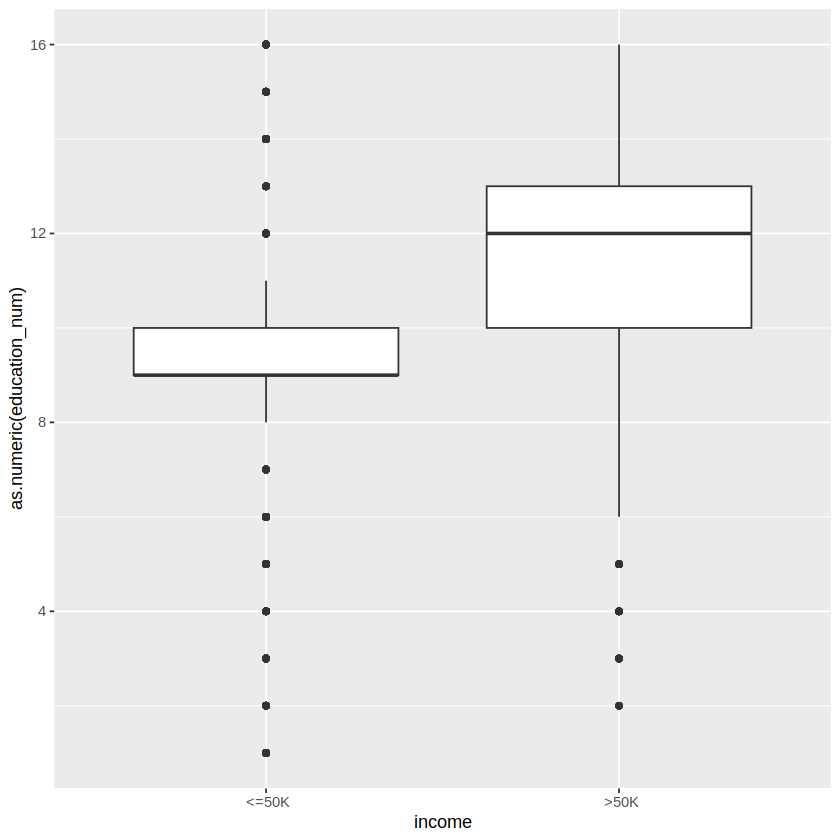

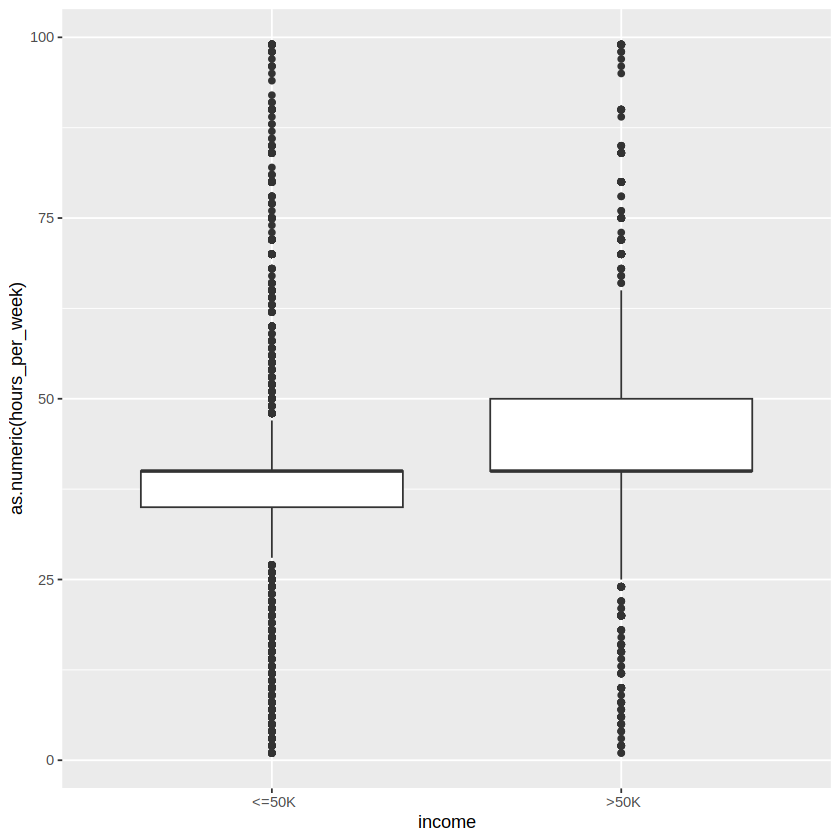

In [5]:
adult_data_selected |>
    ggplot(aes(y = as.numeric(education_num), x = income)) +
    geom_boxplot()
adult_data_selected |>
    ggplot(aes(y = as.numeric(hours_per_week), x = income)) +
    geom_boxplot()

### Exploratory Data Analysis

In [6]:
options(repr.plot.width = 8, repr.plot.height = 7)
income_sum <- adult_data_selected |> 
                group_by(income) |> 
                summarize(count = n())


mean_hrs_per_wk <- adult_data_selected |>
                group_by(income) |>
                summarize(mean_hrs_per_wk = mean(hours_per_week) )
mean_education_num <- adult_data_selected |>
                group_by(income)|>
                summarize(mean_education_num = mean(education_num))




income_sum
mean_hrs_per_wk
mean_education_num

Warning message:
“There were 2 warnings in `summarize()`.
The first warning was:
ℹ In argument: `mean_hrs_per_wk = mean(hours_per_week)`.
ℹ In group 1: `income = " <=50K"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 2 warnings in `summarize()`.
The first warning was:
ℹ In argument: `mean_education_num = mean(education_num)`.
ℹ In group 1: `income = " <=50K"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


income count
1  <=50K 24719
2  >50K   7841

income mean_hrs_per_wk
1  <=50K NA             
2  >50K  NA

income mean_education_num
1  <=50K NA                
2  >50K  NA

### Visualization

### DISCLAIMER: This model takes a while to run due to there being 32560 individuals.

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

adult_testing_recipe <- recipe(income ~ education_num + hours_per_week, data = adult_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

adult_vfold <- vfold_cv(adult_training, v = 5, strata = income)

gridvals <- tibble(neighbors = seq(from = 1, to = 500, by = 20))

adult_training_workflow <- workflow() |>
                add_recipe(adult_testing_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = adult_vfold, grid = gridvals) 


adult_metrics <- adult_training_workflow |>
collect_metrics() |>
filter(.metric == "accuracy")




In [ ]:
adult_metric_plot <- ggplot(adult_metrics, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate")
adult_metric_plot

adult_max <- adult_metrics |>
        filter(neighbors == max(neighbors))
       
a_max <- adult_max |> pull(neighbors)

a_max


### KNN 

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 100) |>
    set_engine("kknn") |>
    set_mode("classification") 


knn_recipe <- recipe( income ~ education_num + hours_per_week, data = adult_data_selected) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 


knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = adult_data_selected)





In [18]:
knn_predict <- predict(knn_workflow, adult_testing) |>
    bind_cols(adult_testing)


hpw <- adult_data_selected |>
    ggplot(aes(x = hours_per_week, y = education_num, color = .pred)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours Worked Per Week (Hours)", y = "Education Level (1-16)", color = "Income") +
    ggtitle("Impact of Education Level and Hours Worked Per Week on Income Prediction")


adult_testing |>
    metrics(truth = income, estimate = .pred_class) |>
    filter(.metric == "accuracy")

hpw

ERROR: [1m[33mError[39m in `metrics()`:[22m
[1mCaused by error:[22m
[33m![39m object '.pred_income' not found


Works Cited

Fuller, J., Raman, M., et al. (2017). Dismissed By Degrees. Published by Accenture, Grads of Life, Harvard Business School.
